In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
from scipy import stats
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

#Path to CSV
final_df_csv = Path("final_df.csv")
final_df = pd.read_csv(final_df_csv)

In [2]:
#Create linear regression function
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    #Create equation for y=mx+b and display on plot at the end of regression line
    equation = f"y= {round(slope,3)}x + {round(intercept,3)}"
    annotation_x = max(x_values)
    annotation_y = regress_values[-1]
    plt.annotate(equation, (annotation_x, annotation_y), color="r", fontsize=15)
    #Display correlation coefficient on the plot
    r_text = f"r-value = {round(rvalue, 3)}"
    plt.text(min(x_values), min(y_values), r_text, color="r", fontsize=12)

In [3]:
#Create map with size based on stop count per zip and shows stops per capita and stops per sqmile
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 800,
                                  frame_height=700,
                                  size="Stop Count",
                                  scale=1.0,
                                  color="Stop Count",
                                  hover_cols=["Stop Count","Stop per capita", 
                                              "Stops per Sq Mile", "Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Stop Count,Stops per Sq Mile,Zipcode)

In [4]:
#Create map with size based on college readiness and shows free/reduced lunch %
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 900,
                                  frame_height=700,
                                  size="College Readiness (%)",
                                  scale=20.0,
                                  color="Zipcode",
                                  hover_cols=["Free/Reduced Lunch (%)","Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Zipcode,College Readiness (%),Free/Reduced Lunch (%))

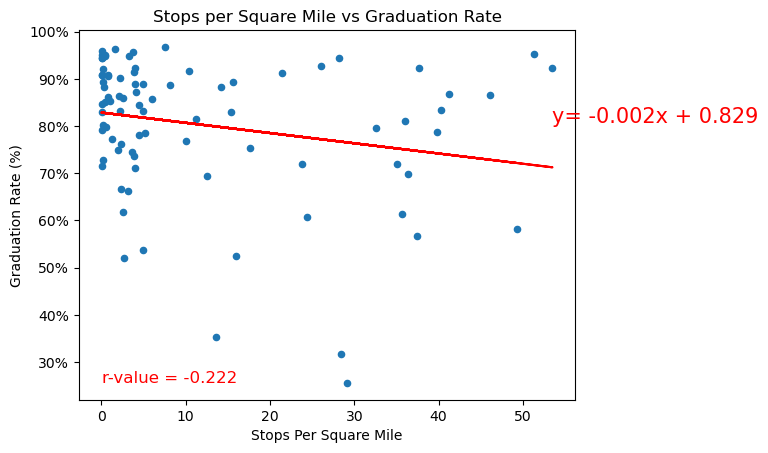

In [5]:
#Stops Per Square Mile vs Graduation Rate
transport_grad = final_df.plot(kind="scatter",x="Stops per Sq Mile",y="Grad Rate (%)",grid=False,
                              xlabel="Stops Per Square Mile",
                              ylabel="Graduation Rate (%)",
                              title="Stops per Square Mile vs Graduation Rate")
transport_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))

x_values = final_df["Stops per Sq Mile"]
y_values = final_df["Grad Rate (%)"]
linear_regression(x_values, y_values)
plt.show()

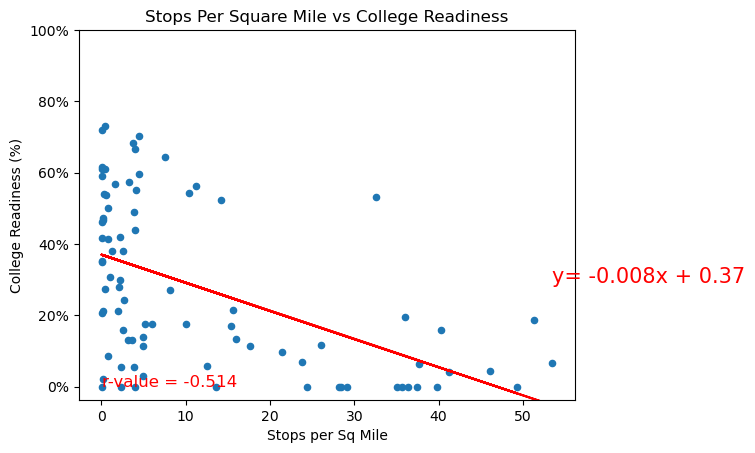

In [6]:
#Stops Per Square Mile vs College Readiness (%)
transport_readiness = final_df.plot(kind="scatter",x="Stops per Sq Mile",y="College Readiness (%)",grid=False,
                                   xlabel="Stops per Sq Mile",
                                   ylabel="College Readiness (%)",
                                   title="Stops Per Square Mile vs College Readiness")
transport_readiness.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
transport_readiness.set_ylim(top=1)

x_values = final_df["Stops per Sq Mile"]
y_values = final_df["College Readiness (%)"]
linear_regression(x_values, y_values)
plt.show()

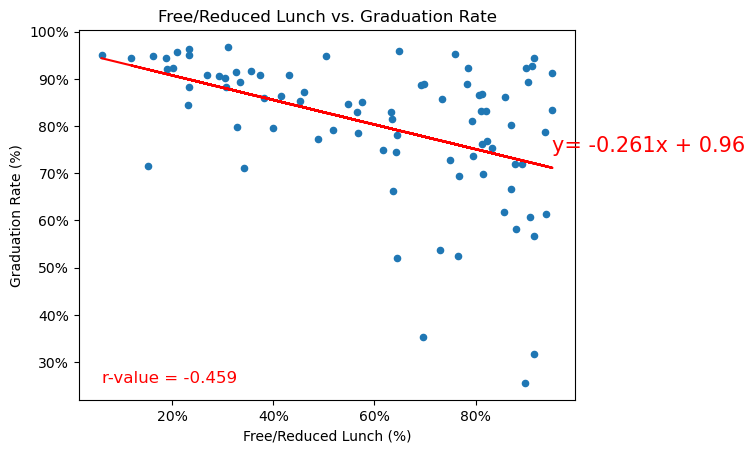

In [7]:
#Free/Reduced Lunch vs. Grad Rate Scatter
freereduced_grad = final_df.plot(kind="scatter", x="Free/Reduced Lunch (%)", y="Grad Rate (%)", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

x_values = final_df["Free/Reduced Lunch (%)"]
y_values = final_df["Grad Rate (%)"]
linear_regression(x_values, y_values)
plt.show()

count    84.000000
mean      0.275561
std       0.232449
min       0.000000
25%       0.063014
50%       0.209231
75%       0.492347
max       0.730104
Name: College Readiness (%), dtype: float64

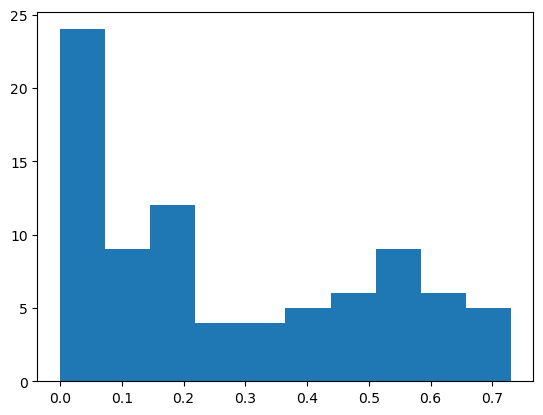

In [8]:
plt.hist(final_df['College Readiness (%)'])
final_df['College Readiness (%)'].describe()

count    84.000000
mean      0.802492
std       0.147927
min       0.255814
25%       0.743260
50%       0.845752
75%       0.907756
max       0.967593
Name: Grad Rate (%), dtype: float64

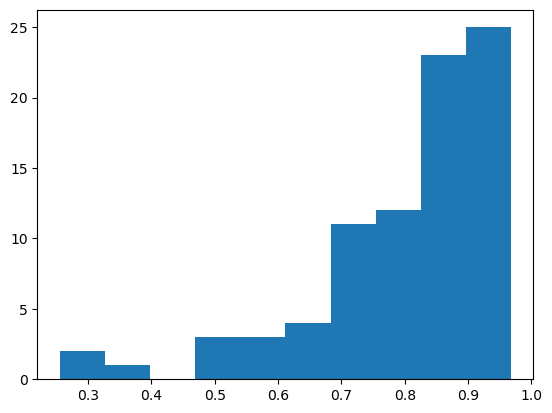

In [9]:
plt.hist(final_df['Grad Rate (%)'])
final_df['Grad Rate (%)'].describe()

count    84.000000
mean     12.002316
std      15.136656
min       0.010880
25%       0.818174
50%       3.971636
75%      18.585922
max      53.505260
Name: Stops per Sq Mile, dtype: float64

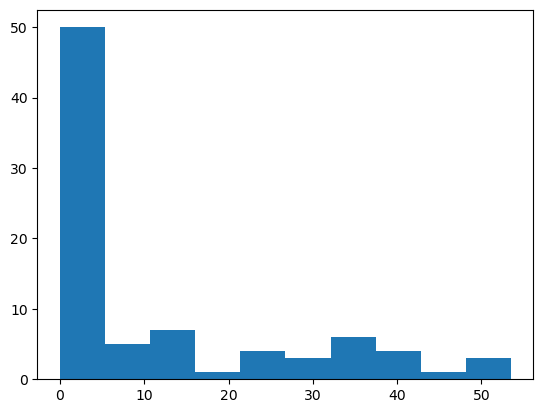

In [10]:
plt.hist(final_df['Stops per Sq Mile'])
final_df['Stops per Sq Mile'].describe()